In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('loan prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [9]:
df = df.dropna()

df_encoded = pd.get_dummies(df, drop_first=True)


In [11]:
X = df_encoded.drop('Loan_Status_Y', axis=1)  # Assuming 'Loan_Status' is the target
y = df_encoded['Loan_Status_Y']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Precision: 0.784
Recall: 0.98
F1-score: 0.8711111111111111


In [16]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Training Accuracy: 1.0
Test Accuracy: 0.7986111111111112


In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17 27]
 [ 2 98]]


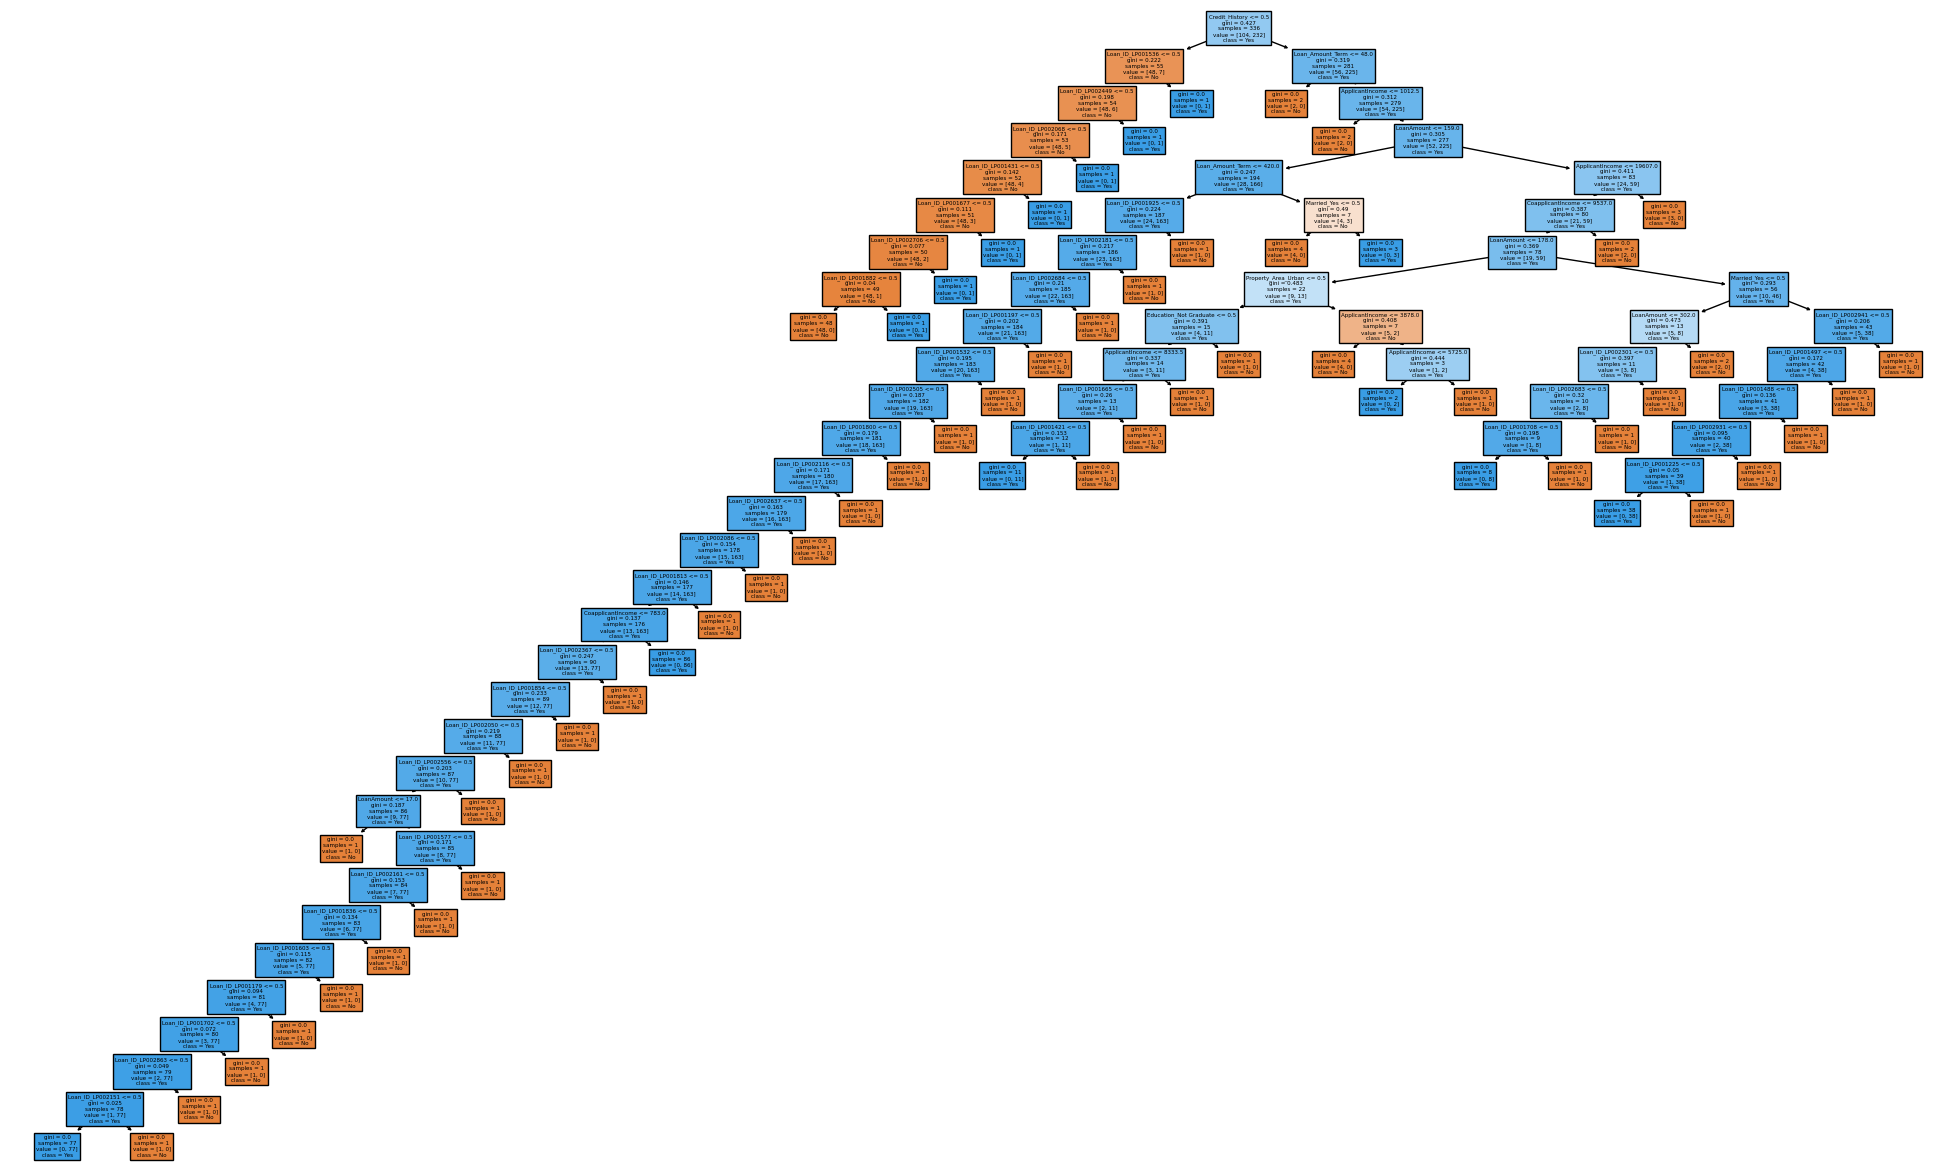

In [20]:
plt.figure(figsize=(25,15)) 
plot_tree(model, 
          filled=True, 
          feature_names=X.columns.tolist(),  
          class_names=["No", "Yes"])
plt.show()